In [1]:
%matplotlib inline
%timeit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import time
import pickle
import datetime

import sys
sys.path.append('/home/ngrav/project/')
from wearables.scripts import data as weardata
from wearables.scripts import eval_ as weareval

from scipy.stats import spearmanr

plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=1
plt.rcParams['savefig.dpi'] = 600
sns.set_style("ticks")

In [2]:
# load data
pfp = '/home/ngrav/project/wearables/results/'
md = pd.read_csv(os.path.join(pfp, 'md_v52_220112.csv'), index_col=0)

# voi
with open('/home/ngrav/project/wearables/results/voi_v52.pkl', 'rb') as f:
    voi = pickle.load(f)
    f.close()
voi_continuous = [k for k,v in voi.items() if v[1]=='continuous']

# add activity vars
voi_continuous = voi_continuous + [
    'IS',
    'IV', 
    'RA', 
    'ISm',
    'IVm',
    'min_rest',
    'ave_logpseudocount_wake',
    'ave_logpseudocount_sleep',
    'ave_logpseudocount_wknd',
    'ave_logpseudocount_wkday',
    'ave_logpseudocount_day',
    'ave_logpseudocount_night',
]

In [5]:
def corr(df, var_list, target='error', bonferonni_crct=True):
    '''Spearman's rho between target col and list of vars
    
    Arguments:
      target (str): colname of one column with which to compare each var in var_list 
    '''
    from scipy.stats import spearmanr
    out = {}
    a = df[target].to_numpy()
    for var in var_list:
        b = df[var].to_numpy()
        rho, p = spearmanr(a, b)
        if bonferonni_crct:
            p = p*len(var_list)
        out[var] = {'rho':rho, 'p':p}
    return out

In [10]:
res = corr(md, voi_continuous)
res = pd.DataFrame(res).T.reset_index()
res.sort_values(by='rho')

,index,rho,p
16,infant_length,-0.093170,0.000022
20,IV,-0.087445,0.000102
23,IVm,-0.081550,0.000448
15,infant_wt,-0.066715,0.012133
19,IS,-0.060119,0.043414
17,head_circ,-0.059872,0.045434
22,ISm,-0.057653,0.067862
6,cbc_mcv,-0.052194,0.172252
28,ave_logpseudocount_wkday,-0.040257,1.007824
29,ave_logpseudocount_day,-0.035151,1.920086


In [12]:
md['abserror'] = md['error'].abs()
resabs = corr(md, voi_continuous, target='abserror')
resabs = pd.DataFrame(resabs).T.reset_index()
resabs.sort_values(by='rho')

,index,rho,p
19,IS,-0.056080,0.089471
22,ISm,-0.054409,0.119160
18,bc_years1,-0.050234,0.236118
29,ave_logpseudocount_day,-0.047369,0.367749
26,ave_logpseudocount_sleep,-0.045748,0.468040
6,cbc_mcv,-0.041387,0.866027
28,ave_logpseudocount_wkday,-0.034759,2.012065
0,age_enroll,-0.032171,2.714433
3,cbc_hct,-0.030938,3.112747
7,art_pco2,-0.022656,7.098829


In [13]:
md['sqerror'] = md['error']**2
ressqer = corr(md, voi_continuous, target='sqerror')
ressqer = pd.DataFrame(ressqer).T.reset_index()
ressqer.sort_values(by='rho')

,index,rho,p
6,cbc_mcv,-0.062067,0.306994
0,age_enroll,-0.054105,0.762236
19,IS,-0.053779,0.789418
18,bc_years1,-0.052028,0.950580
22,ISm,-0.051139,1.042687
29,ave_logpseudocount_day,-0.042961,2.305422
26,ave_logpseudocount_sleep,-0.031852,5.764420
4,cbc_wbc,-0.030699,6.274230
28,ave_logpseudocount_wkday,-0.028854,7.157028
3,cbc_hct,-0.026728,8.279643


# conclusion

interdaily stability (circadian rhythmicity) is weakly negatively correlated with model error so the model scores less circadian stable people higher than their actual GA but the effect is weak

<AxesSubplot:xlabel='IS', ylabel='error'>

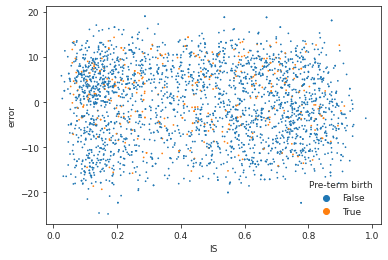

In [19]:
sns.scatterplot(x='IS', y='error', hue='Pre-term birth', data=md, linewidth=0, s=3)

In [23]:
# get list o fhigh errors
error_grps = {
    'high': md.loc[md['error'] >= 10, :].index.to_list(),
    'low': md.loc[md['error'] <= -10, :].index.to_list()}


In [25]:
with open('/home/ngrav/project/wearables/results/errorgrp_dev_v52.pkl', 'wb') as f:
    pickle.dump(error_grps, f, protocol=pickle.HIGHEST_PROTOCOL)
    f.close()